In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams


%matplotlib inline

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.shape


(7043, 21)

__7043 data objects with 21 attributes__


In [5]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


__Note__:

First of all, drop customerID because it should not effect to churn probability

In [6]:
data.drop(['customerID'], axis=1, inplace = True)

__Target Feature__

In [7]:
data['Churn'].value_counts(sort = False)

Yes    1869
No     5174
Name: Churn, dtype: int64

In [8]:
data['Churn'].value_counts(sort = False)

Yes    1869
No     5174
Name: Churn, dtype: int64

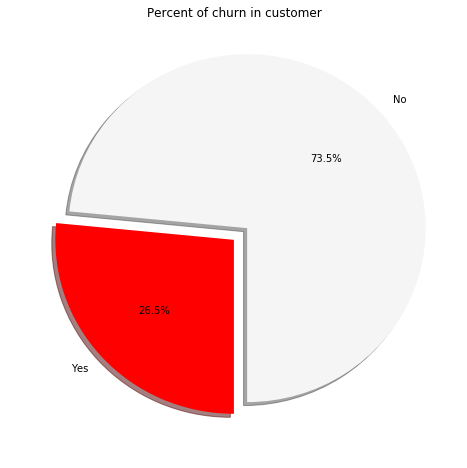

In [9]:
# Data to plot
labels =data['Churn'].value_counts(sort = True).index
sizes = data['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

__Finding__

In training set, contain Churn customer only 26.5%

In [10]:
data['Churn'] = data['Churn'].map(lambda s :1 if s == 'Yes' else 0)

__Data Wrangling__

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(3), object(16)
memory usage: 1.1+ MB


In [12]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Churn,0,0.0
TotalCharges,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0


__Finding__

No missing data ?

In [13]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


__Processing__

Gender: Customer gender (female, male)

Because we can't put string in model, then I decide to create new binary columns.

In [15]:
data['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

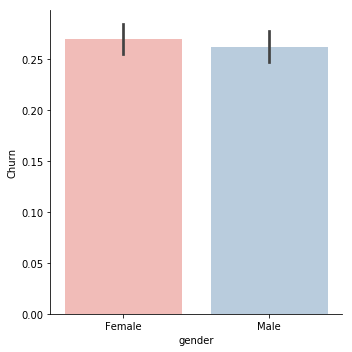

In [16]:
g = sns.factorplot(y="Churn", x="gender", data=data, kind ="bar", palette = "Pastel1")

In [17]:
data = pd.get_dummies(data = data, columns=['gender'])

__Preprocessing__

SeniorCitizen: whether the customer is a senior citizen or not (1,0)
This feature is ready to use

In [18]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

__Preprocessing__

Partner: Whether the customer has a partner or not (Yes, No)

This feature value has the same meaning with SeniorCitizen. But it is a "Yes/No" values then we need to change format

In [19]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [23]:
data['Partner'] = data['Partner'].map(lambda s :1 if s=='Yes' else 0)
data['Partner'].value_counts()

0    7043
Name: Partner, dtype: int64

__Preprocessing__

Dependents, PhoneServices, PaperlessBilling

Do the same what we do in "Partner" column

In [24]:
data['Dependents'] = data['Dependents'].map(lambda s:1 if s =='Yes' else 0)

data['PhoneService'] = data['PhoneService'].map(lambda s:1 if s =='Yes' else 0)

data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s:1 if s =='Yes' else 0)

__Preprocessing__

Tenure: Number of months the customer has stayed with the company
*_This is numerical feature we can cut it to bin width but I think it ready to use_*

In [25]:
data['tenure'].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

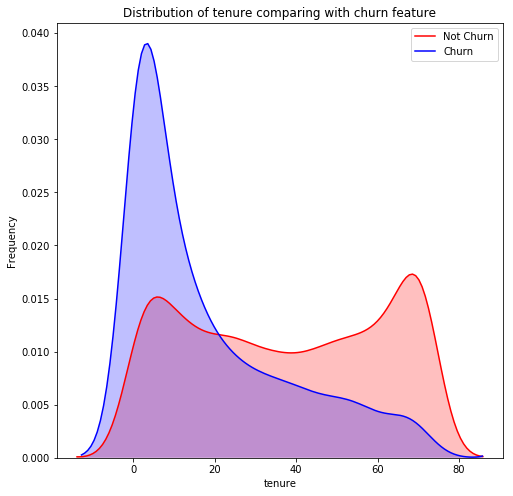

In [26]:
# tenure distibution 
g = sns.kdeplot(data.tenure[(data["Churn"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(data.tenure[(data["Churn"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

__Finding__

*_Seem like most of churn customer stayed in company less than 20 months and customer with high value in tenure has low probability to churn_*


__Preprocessing__

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service).

Look like Yes No feature but it contain 3 values. 
I should create new column that can tell model this customer has phone service or not.
but we already have 'PhoneService' columns, 
then I decide to assume that "No phone service" has the same meaning with "No"

In [28]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [29]:
data['MultipleLines'].replace('No phone service','No', inplace=True)
data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
data['MultipleLines'].value_counts()


0    4072
1    2971
Name: MultipleLines, dtype: int64

__Preprocessing__

InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

*_First of all, I want something like "PhoneService" column, then I decide to create Has_InternetService column which can tell this customer has internet or not._*

*_Next, if thet have internet service wen need to tell model what kind of service_*



In [30]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [31]:
data['Has_InternetService'] = data['InternetService'].map(lambda s :0  if s =='No' else 1)
data['Fiber_optic'] = data['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
data['DSL'] = data['InternetService'].map(lambda s :1  if s =='DSL' else 0)

In [32]:
print(data['Has_InternetService'].value_counts())
print(data['Fiber_optic'].value_counts())
print(data['DSL'].value_counts())
data.drop(['InternetService'], axis=1, inplace=True)

1    5517
0    1526
Name: Has_InternetService, dtype: int64
0    3947
1    3096
Name: Fiber_optic, dtype: int64
0    4622
1    2421
Name: DSL, dtype: int64


__Preprocessing__

*_OnlineSecurity OnlineBackup DeviceProtection_*
*_TechSupport StreamingTV StreamingMovies_*

All of these columns have the same format,I do the samething what I do in "MultipleLines" column

In [33]:
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)

__Preprocessing__

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))


This is categorical feature, I will use pandas function "get_dummies" for this feature

In [34]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [35]:
data = pd.get_dummies(data=data, columns=['PaymentMethod'])

__Note__

What we got from get_dummies ??


In [36]:
data[['PaymentMethod_Electronic check',
      'PaymentMethod_Mailed check',
      'PaymentMethod_Bank transfer (automatic)',
      'PaymentMethod_Credit card (automatic)']].head()

,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0


__Preprocessing__

Contract : The contract term of the customer (Month-to-month, One year, Two year)

*_this is also categorical value, let "get_dummies" it_*

In [37]:
data['Contract'].value_counts(())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [38]:
data = pd.get_dummies(data=data, columns=['Contract'])

__Preprocessing__

MonthlyCharges: The amount charged to customer monthly

*_numerical features and lucky !! it ready to use_*


In [39]:
data['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

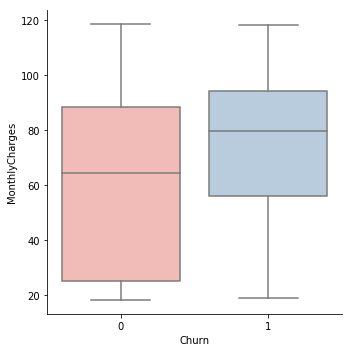

In [40]:
g = sns.factorplot(x="Churn", y = "MonthlyCharges", data = data, kind ="box", palette = "Pastel1")

__Finding__

According to above plot, High MonthlyCharges may affect to churn probability.

And seem like customer will not churn if they have low a mount in MonthlyCharges

__Preprocessing__

TotalCharges : The total amount charged to the customer

*_numerical feature !?, but now it still in object type. We need to fix it._*


In [41]:
data['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [42]:
## because 11 rows contain " " , it means 11 missing data in our dataset
len(data[data['TotalCharges'] == " "])

11

In [43]:
## Drop missing data
data = data[data['TotalCharges'] != " "]

In [44]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
## At first time I use this command but it error because some value contain " "
## That why I know " " hide in our dataset

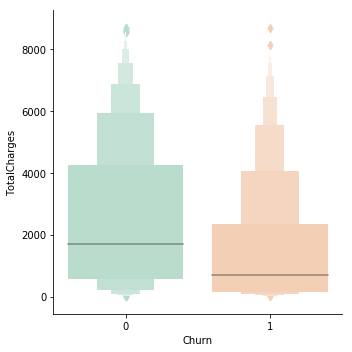

In [45]:
g = sns.factorplot(y="TotalCharges",x="Churn",data=data,kind="boxen", palette = "Pastel2")

__Finding__

From boxen plot, most of churn customer has less than 2000 in total chrage.
In range of 2500 to 8000, population of loyalty customer is around twice as amount as churn customer.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
tenure                                     7032 non-null int64
PhoneService                               7032 non-null int64
MultipleLines                              7032 non-null int64
OnlineSecurity                             7032 non-null int64
OnlineBackup                               7032 non-null int64
DeviceProtection                           7032 non-null int64
TechSupport                                7032 non-null int64
StreamingTV                                7032 non-null int64
StreamingMovies                            7032 non-null int64
PaperlessBilling                           7032 non-null int64
MonthlyCharges                             7032 non-null float64
TotalChar

__Creating Model & Evaluate__

In this step, I will use model with default parameter compare with tuning parameter by using grid search
  Gridsearch is just like try to put all possible combining between parameter in ranges that we input.
  It consume a lot of time, I decide to comment some line. you can try uncomment it when run in your local PC.

In [47]:
data["Churn"] = data["Churn"].astype(int)

Y_train = data["Churn"]
X_train = data.drop(labels = ["Churn"],axis = 1)

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [49]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(Rfclf, X_train, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79119318 0.77840909 0.79261364 0.79516358 0.77382646 0.74253201
 0.76813656 0.78236131 0.76671408 0.79202279]


0.7782972698268751

__Finding__

My default random forest get around 78% accuracy from cross-validation

In [50]:
%%time
param_grid  = { 
                'n_estimators' : [500,1200],
               # 'min_samples_split': [2,5,10,15,100],
               # 'min_samples_leaf': [1,2,5,10],
                'max_depth': range(1,5,2),
                'max_features' : ('log2', 'sqrt'),
                'class_weight':[{1: w} for w in [1,1.5]]
              }

GridRF = GridSearchCV(RandomForestClassifier(random_state=15), param_grid)

GridRF.fit(X_train, Y_train)
#RF_preds = GridRF.predict_proba(X_test)[:, 1]
#RF_performance = roc_auc_score(Y_test, RF_preds)

print(
    #'DecisionTree: Area under the ROC curve = {}'.format(RF_performance)
     "\nBest parameters \n" + str(GridRF.best_params_))



Best parameters 
{'class_weight': {1: 1.5}, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500}
CPU times: user 1min 11s, sys: 103 ms, total: 1min 11s
Wall time: 1min 11s


In [51]:
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 1.5}, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

__K-Fold CV with accuracy metric__

In [52]:
#10 Fold Cross Validation

clf_score = cross_val_score(rf, X_train, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.80539773 0.81392045 0.80823864 0.81792319 0.78093883 0.79089616
 0.81507824 0.79800853 0.78662873 0.8005698 ]


0.8017600302962146

__Finding__

My grid-search random forest get around 80% accuracy from cross-validation,
a little bit improve from default parameter

# Feature importances

__Another advantage from rule-based model__

In [54]:
Rfclf_fea = pd.DataFrame(rf.feature_importances_)
Rfclf_fea["Feature"] = list(X_train) 
Rfclf_fea.sort_values(by=0, ascending=False).head()

,0,Feature
24,0.213549,Contract_Month-to-month
3,0.156382,tenure
26,0.117441,Contract_Two year
18,0.105345,Fiber_optic
22,0.082357,PaymentMethod_Electronic check


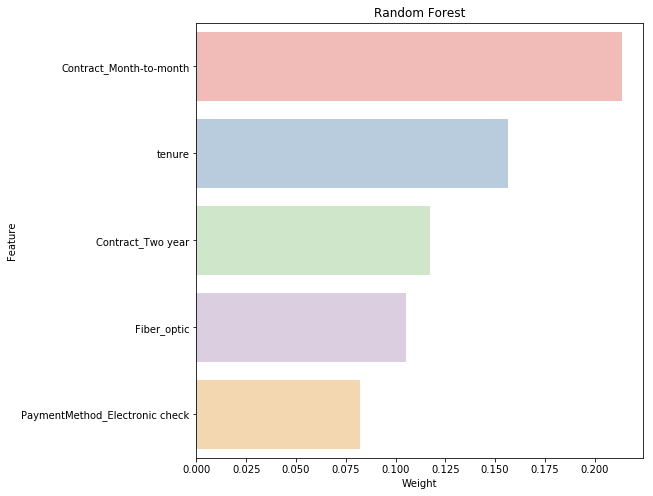

In [55]:
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

__Confusion Matrix__

Also known as an error matrix, it is a specific table layout that allows visualization of the performance of an algorithm

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_train)

print(confusion_matrix(Y_train, y_pred))

[[4614  549]
 [ 837 1032]]


In [57]:
from sklearn.metrics import classification_report

print(classification_report( Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5163
           1       0.65      0.55      0.60      1869

    accuracy                           0.80      7032
   macro avg       0.75      0.72      0.73      7032
weighted avg       0.79      0.80      0.80      7032



In [58]:
data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Has_InternetService,Fiber_optic,DSL,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,0,2,1,0,1,1,0,0,...,1,0,1,0,0,0,1,1,0,0
3,0,0,0,45,0,0,1,0,1,1,...,1,0,1,1,0,0,0,0,1,0
4,0,0,0,2,1,0,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
5,0,0,0,8,1,1,0,0,1,0,...,1,1,0,0,0,1,0,1,0,0
6,0,0,1,22,1,1,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
7,0,0,0,10,0,0,1,0,0,0,...,1,0,1,0,0,0,1,1,0,0
8,0,0,0,28,1,1,0,0,1,1,...,1,1,0,0,0,1,0,1,0,0
9,0,0,1,62,1,0,1,1,0,0,...,1,0,1,1,0,0,0,0,1,0


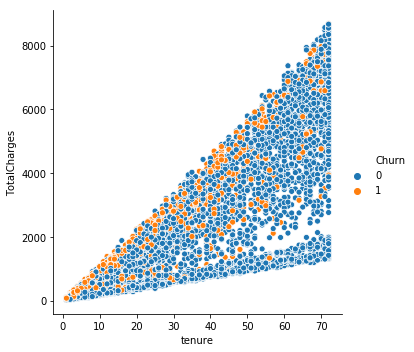

In [59]:
sns.relplot(data=data,x="tenure",y="TotalCharges",hue="Churn")

In [60]:
data.corr()["Churn"]

SeniorCitizen                              0.150541
Partner                                         NaN
Dependents                                -0.163128
tenure                                    -0.354049
PhoneService                               0.011691
MultipleLines                              0.040033
OnlineSecurity                            -0.171270
OnlineBackup                              -0.082307
DeviceProtection                          -0.066193
TechSupport                               -0.164716
StreamingTV                                0.063254
StreamingMovies                            0.060860
PaperlessBilling                           0.191454
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_Female                              0.008545
gender_Male                               -0.008545
Has_InternetService                        0.227578
Fiber_optic 

__Contract_Month_to_month, Fiber_optic, tenure, SeniorCitizen__


In [61]:
small = data[["Contract_Month-to-month", "Fiber_optic", "tenure", "SeniorCitizen"]]

In [62]:
rf = RandomForestClassifier(random_state=15, **GridRF.best_params_)
rf.fit(small, Y_train)
clf_score = cross_val_score(rf, small, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.78551136 0.77840909 0.79119318 0.80654339 0.79089616 0.76955903
 0.79516358 0.77951636 0.79516358 0.78490028]


0.7876856026527079

In [64]:
small = data[["Contract_Month-to-month", "Fiber_optic", 
             "tenure", "SeniorCitizen", "Has_InternetService"]]

rf = RandomForestClassifier(random_state=15, **GridRF.best_params_)
rf.fit(small, Y_train)
clf_score = cross_val_score(rf, small, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.78977273 0.78409091 0.78693182 0.79516358 0.78378378 0.77098151
 0.79800853 0.77240398 0.78805121 0.8005698 ]


0.78697578582447

In [71]:
data["percentageCharge"]= -data["TotalCharges"]/data["MonthlyCharges"]

In [72]:
data[["Churn", "percentageCharge"]].corr()

,Churn,percentageCharge
Churn,1.000000,0.353775
percentageCharge,0.353775,1.000000


In [73]:
small=data[["Contract_Month-to-month", "Fiber_optic", "tenure", "SeniorCitizen","Has_InternetService","percentageCharge"]]
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(small, Y_train)
clf_score = cross_val_score(rf, small, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79545455 0.79829545 0.78835227 0.79516358 0.77809388 0.76813656
 0.79800853 0.78093883 0.79231863 0.81196581]


0.7906728113142586

In [74]:
data["partdepends"]=data["Partner"]*data["Dependents"]
data[["Churn","partdepends"]].corr()

,Churn,partdepends
Churn,1.0,NaN
partdepends,NaN,NaN


In [75]:
data["tvmovies"]=data["StreamingTV"]+data["StreamingMovies"]
data[["Churn","tvmovies"]].corr()

,Churn,tvmovies
Churn,1.000000,0.070872
tvmovies,0.070872,1.000000


In [76]:
data["backup_security"]=-data["OnlineSecurity"]*data["OnlineBackup"]
data[["Churn","backup_security"]].corr()

,Churn,backup_security
Churn,1.000000,0.157719
backup_security,0.157719,1.000000


In [78]:
small=data[["Contract_Month-to-month", "Fiber_optic", "tenure", "SeniorCitizen","Has_InternetService","percentageCharge","PaperlessBilling"]]
rf = RandomForestClassifier(random_state=15, **GridRF.best_params_)
rf.fit(small, Y_train)
clf_score = cross_val_score(rf, small, Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.796875   0.80113636 0.79261364 0.79943101 0.78520626 0.76813656
 0.80227596 0.78805121 0.78520626 0.80769231]


0.7926624562315352

__With 9 feature accuracy is nearly identical as full feature classification set__

In [81]:
small = data[["Contract_Month-to-month", "Fiber_optic",
             "tenure", "SeniorCitizen", "Has_InternetService",
             "percentageCharge", "PaperlessBilling", "OnlineSecurity"]]

from sklearn.feature_selection import SelectKBest, f_classif
kbest = SelectKBest(f_classif, k=4)

rf = RandomForestClassifier(random_state = 15, **GridRF.best_params_)

rf.fit(small, Y_train)
clf_score = cross_val_score(rf, kbest.fit_transform(small, Y_train), Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.76846591 0.80255682 0.78409091 0.78520626 0.75960171 0.75675676
 0.78662873 0.77667141 0.77098151 0.78917379]


0.7780133798225904

__With 4 Feature we lost accuracy__

In [82]:
small=data[["Contract_Month-to-month", "Fiber_optic", "tenure", "SeniorCitizen","Has_InternetService","percentageCharge","PaperlessBilling","OnlineSecurity"]]
from sklearn.feature_selection import SelectKBest,f_classif
kbest= SelectKBest(f_classif, k=6)
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(small, Y_train)
clf_score = cross_val_score(rf, kbest.fit_transform(small,Y_train), Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.78835227 0.81392045 0.78835227 0.79943101 0.77951636 0.76386913
 0.80654339 0.78378378 0.78236131 0.8005698 ]


0.7906699779232674

__With 6 Features model is work just fine__

In [83]:
from sklearn.feature_selection import SelectKBest,f_classif
kbest= SelectKBest(f_classif, k=6)
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(small, Y_train)
clf_score = cross_val_score(rf, kbest.fit_transform(data.drop(labels = ["Churn"],axis = 1),Y_train), Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.77982955 0.80113636 0.80113636 0.80512091 0.77098151 0.76671408
 0.80512091 0.78520626 0.78520626 0.7991453 ]


0.7899597500748816

In [84]:
from sklearn.feature_selection import SelectKBest,f_classif
kbest= SelectKBest(f_classif, k=8)
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(small, Y_train)
clf_score = cross_val_score(rf, kbest.fit_transform(data.drop(labels = ["Churn"],axis = 1),Y_train), Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79829545 0.81107955 0.79403409 0.79658606 0.77240398 0.77382646
 0.80654339 0.78662873 0.78520626 0.80626781]


0.7930871776266513

In [85]:
from sklearn.feature_selection import SelectKBest,f_classif
kbest= SelectKBest(f_classif, k=2)
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
clf_score = cross_val_score(rf, kbest.fit_transform(data.drop(labels = ["Churn"],axis = 1),Y_train), Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.74289773 0.74147727 0.734375   0.72830725 0.7140825  0.71123755
 0.74395448 0.75248933 0.72830725 0.76638177]


0.7363510144760144

__What about confusion matrix?__

In [86]:
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
from sklearn.model_selection import train_test_split

X2_train, X2_test, y_train, y_test = train_test_split(data.drop(labels = ["Churn"],axis = 1), Y_train, test_size=0.25, random_state=42)

kbest= SelectKBest(f_classif, k=8)
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(X2_train,y_train)
ypred=rf.predict(X2_test)
import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_pred=ypred,y_true=y_test))
print(metrik.accuracy_score(y_pred=ypred,y_true=y_test))

[[1168  132]
 [ 216  242]]
0.8020477815699659


Okay Later we should balance the dataset (Data Augmention) and examine furher with other algorithms such as SVM and KNN. Tree algorithms is resisted for this type of imbalanced datasets.

Simpler models is more predictable and more explainable than complicated ones. İf we cut some features, we will create simpler models easily.